<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/Linear_Algebra_HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3 Linear Regression
### QR Decomposition
Linear regression is a method to find the line of best fit when given some data points. The first peace of the puzzle to achieve linear regression is **QR Disposition**.  It is particularly usefully when solving the linear **least squares problem**.


However, before diving into this, let's talk about QR Disposition  **least squares problem** . **QR Decomposition** is a factorization of a matrix $ A $ into two components:

1. **Q**: An orthogonal (or orthonormal) matrix.
2. **R**: An upper triangular matrix.

It is derived using the Gram-Schmidt algorithm and is formally written as:

$
A = QR
$

Where:
- $ A $ is the original $ n \times m $ matrix .
- $ Q $ is an $ n \times m $ matrix with orthonormal columns $ Q^T Q = I $.
- $ R $ is an $ m \times m $ upper triangular matrix.


How let's talk about the **least squares problem** before applying into QR Decomposition.

### Least-squares problem

Let's say that we have a linear system $Ax = b$, where matrix A $\in \mathbb{R}^{n \times m}$ and vector b $\mathbb{R}^{n}$. However, let's say that $A$ is a non square matrix, so there isn't an easy was to find the exact answer. We formally call this a **over-determined** system, where $n > m$. This is the **least-squares problem**, formally know as:
$
\min_{x \in \mathbb{R}^m} \| A x - b \|
$
There is a couple ways of solving this normal equation:

1. Using the **normal equations**: $A^TAx =A^Tb$, when A has linearly independent columns the system can be solve by be solved by $ x* = (A^TA)^-1 A^T\mathbf{b}$, but his numerical stability issues
2. **QR Decomposition**, a more stable approach, involves forming an orthonormal basis of $col(A)$ through QR decomposition. Then, we form the orthogonal projection matrix and apply it to $b$. Next, using the QR decomposition of $col(A)$, we ultimately get the equation $Rx^*=Q^Tb$, which is solved through **back substitution** to find the approximate solution $x*$


Let's say that we wanted to approximate a car's mile per gallon(MPG) without looking up its actual mile per gallon given its horsepower. Well we can't for sure know what it is, it is almost impossible, but we can make a good guess using the normal equations and QR decomposition. The following python code shows this:





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
mpg_data = sns.load_dataset('mpg')

# Drop rows with missing values in 'horsepower' and 'mpg'
mpg_data = mpg_data[['horsepower', 'mpg']].dropna()

# Select the 'horsepower' feature and the target variable (mpg)
X = mpg_data[['horsepower']]
y = mpg_data['mpg']

# Add a bias term (column of 1s) to X for the intercept
X['Bias'] = 1

# Convert to numpy arrays
A = X.values
b = y.values

# Normal Equations: x = (A^T A)^-1 A^T b
A_T_A = np.dot(A.T, A)
A_T_b = np.dot(A.T, b)
x_normal_eq = np.linalg.inv(A_T_A).dot(A_T_b)

# QR Decomposition: A = QR
Q, R = np.linalg.qr(A)

# Solve R x = Q^T b using back substitution
x_qr = np.linalg.solve(R, np.dot(Q.T, b))

# Predicted values using Normal Equations
y_pred_normal_eq = np.dot(A, x_normal_eq)

# Predicted values using QR Decomposition
y_pred_qr = np.dot(A, x_qr)

# Sort the data by horsepower for a clearer line plot
sorted_idx = np.argsort(X['horsepower'])
sorted_horsepower = X['horsepower'].iloc[sorted_idx]





In [2]:

# Sort the predicted values
sorted_y_pred_normal_eq = y_pred_normal_eq[sorted_idx]
sorted_y_pred_qr = y_pred_qr[sorted_idx]

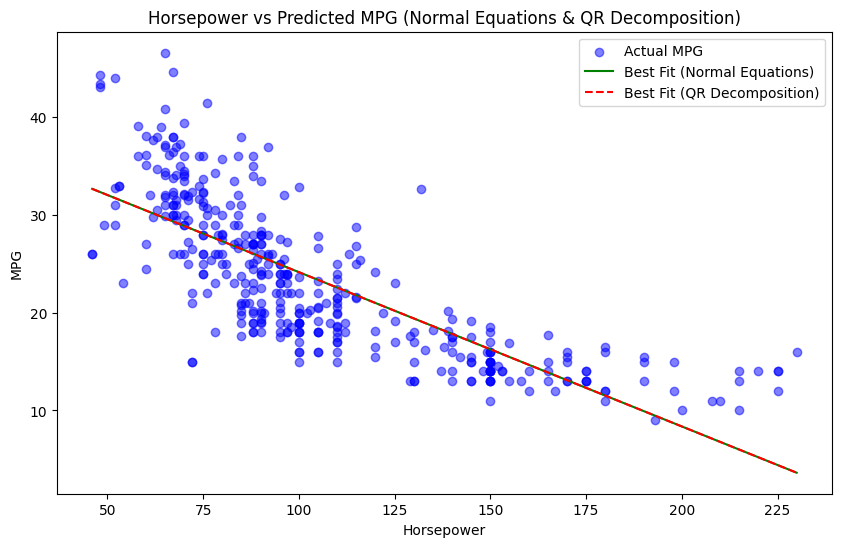

In [3]:
# Plot actual vs predicted for horsepower
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X['horsepower'], b, label='Actual MPG', color='blue', alpha=0.5)

# Line of best fit for Normal Equations
plt.plot(sorted_horsepower, sorted_y_pred_normal_eq, label='Best Fit (Normal Equations)', color='green')

# Line of best fit for QR Decomposition
plt.plot(sorted_horsepower, sorted_y_pred_qr, label='Best Fit (QR Decomposition)', color='red', linestyle='--')

plt.title('Horsepower vs Predicted MPG (Normal Equations & QR Decomposition)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

### Linear Regression
The most broken down version of machine learning is **Linear Regression**. The goal is to minimize loss, commonly MSE which is formally know as:

However, let's look at this in the scope of **least-squares problem**. Formally, we can present it as:

Given a set of input data points $(x_i, y_i)_{i=1}^{n}$, where each $ x_i = (x_{i1}, x_{i2}, \dots, x_{id})^T $ we seek an affine function to fit the data. The common approach involves finding coefficients $\beta_j$
that minimize the criterion

$
\sum_{i=1}^{n} (y_i - \hat{y_i})^2
$

where

$
\hat{y_i} = \beta_0 + \sum_{j=1}^{d} \beta_j x_{ij}
$

This is equivalent to:

$
\min_{\beta} \| y - A \beta \|^2
$

Taking us back to how we solve the least-squares problem. However, what advantage does this approach have in finding the optimal solution using the normal equation or QR Decomposition? They do, in fact, give us the optimal solution every time, right? Well, yes, that is if we can complete the computation on them. More often than not, there are too many data points to calculate that optimal solution using these methods, given computational power limits and computational time. They are just not practical in the real world when dealing with millions of data points.

Let's look at the California Housing Dataset and make a model that predicts the cost of house based on medium salary, with 20,640 samples we can still solve it with QR Decomposition, and the Normal equation but if we use linear regression we will also end up with the same answer.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target


In [5]:
# load data

# select (Median Income)
X = X[:, 0].reshape(-1, 1)

# add a bias term (for normal equations and QR decomposition)
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

#split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 1. Linear Regression

# create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = model.predict(X_test)


In [7]:
# 2. Normal Equations: beta = (A^T A)^-1 A^T y

A_T_A = np.dot(X_bias.T, X_bias)
A_T_y = np.dot(X_bias.T, y)
beta_normal_eq = np.linalg.inv(A_T_A).dot(A_T_y)
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred_ne = np.dot(X_test_bias, beta_normal_eq)

In [8]:
# 3. QR Decomposition: A = QR

Q, R = np.linalg.qr(X_bias)

# solve for beta using QR decomposition: R beta = Q^T y
beta_qr = np.linalg.solve(R, np.dot(Q.T, y))

# Predict values using QR decomposition on the test set
y_pred_qr = np.dot(X_test_bias, beta_qr)

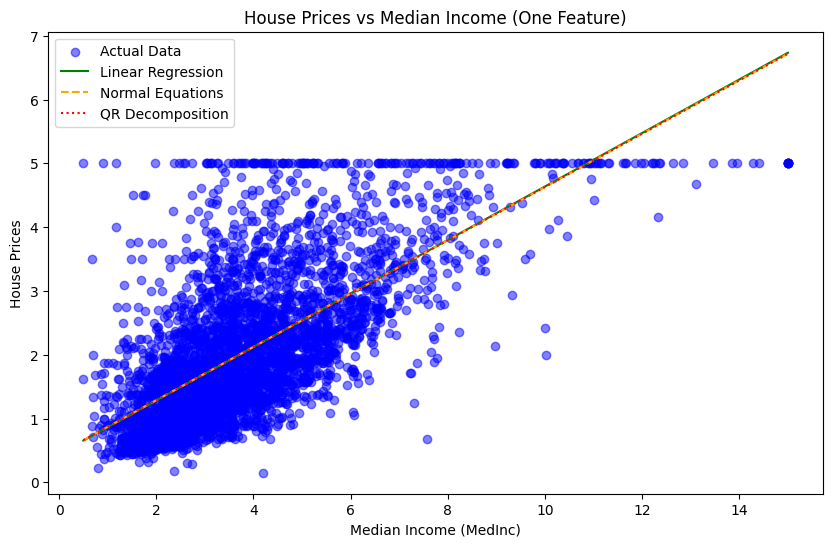

In [9]:
# plot all predictions against the actual data
plt.figure(figsize=(10, 6))

# sort the test data for a better line plot
sorted_idx = np.argsort(X_test[:, 0])
sorted_X_test = X_test[sorted_idx]

# Plot actual data points

plt.scatter(X_test, y_test, label='Actual Data', color='blue', alpha=0.5 )

# Plot predictions from Linear Regression
plt.plot(sorted_X_test, y_pred_lr[sorted_idx], label='Linear Regression', color='green', linestyle = 'solid')

# Plot predictions from Normal Equations
plt.plot(sorted_X_test, y_pred_ne[sorted_idx], label='Normal Equations', color='orange', linestyle = 'dashed')

# Plot predictions from QR Decomposition
plt.plot(sorted_X_test, y_pred_qr[sorted_idx], label='QR Decomposition', color='red', linestyle = 'dotted')

plt.title('House Prices vs Median Income (One Feature)')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Prices')
plt.legend()
plt.show()